Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None

Summary Statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934  

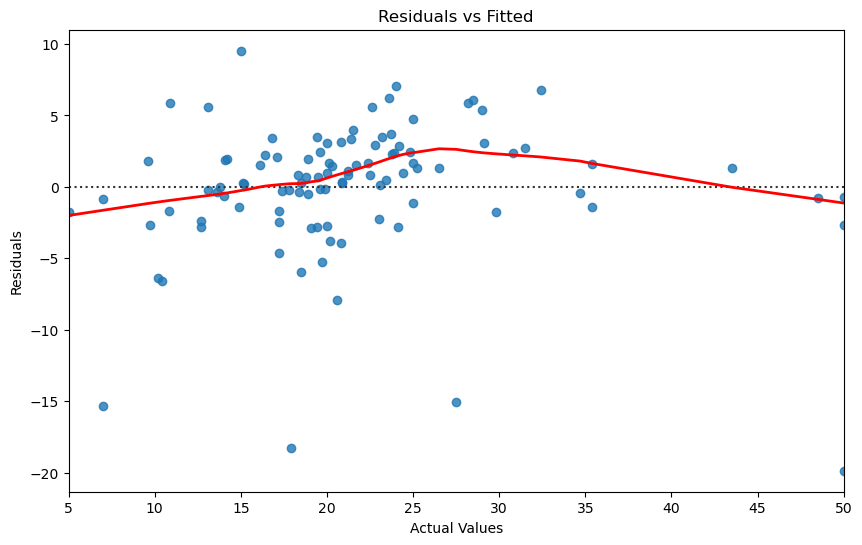

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score


# Loading Dataset
data_path = '../data/boston_housing.csv'
# Read CSV file and convert na values in the data to np.nan
df = pd.read_csv(data_path,  na_values='NA') 


#View Overview of Data
print("Data Structure:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

#Check if there are any missing values 
missing_values = df.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)

#Handling missing values
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Standardize Numerical Features to make mean 0
scaler = StandardScaler()
numerical_features = df_imputed.drop(columns=['MEDV']).columns  # Exclude target variable
df_imputed[numerical_features] = scaler.fit_transform(df_imputed[numerical_features])

print(df_imputed)

X = df_imputed.drop(columns=['MEDV'])  # Features
y = df_imputed['MEDV']  # Target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluation on training set
train_score = model.score(X_train, y_train)
print(f"Training R-squared: {train_score:.2f}")

# Predictions on Test Set
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title("Residuals vs Fitted")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()